## Using Pandas to Curate Data from the New York Public Library's *What's On the Menu?* Project

Alok K. Shukla

Aug 3, 2017

In [39]:
# By convention
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

import bisect

def justLesserThan2012(values):
    values.sort()
    index = bisect.bisect(values, 2012)
    return values[index-1]

def justGreaterThan1851(values):
    values.sort()
    index = bisect.bisect(values, "1850")
    return values[index]

In [4]:
#print(justLesserThan2012(["1","2","1851","1852","1854","2010"]))

#### Loading Data

For this I want to setup two DataFrames—one with the contents of Dish.csv (~25 MB in the latest download) and one with the contents of MenuItem.csv (~114 MB).

As mentioned, Open Refine hangs before it can load MenuItem.csv (without increasing the Java heap size to provide more memory). So, though the timings will vary across systems, I've included time profiling information to show how speedily Pandas handles this job.

In [5]:
%%time

dish_data = '../Cleaned Data/Dish/Dish-Clean.csv'
dish_df = pd.read_csv(dish_data, index_col='id',encoding='latin1')

CPU times: user 742 ms, sys: 112 ms, total: 855 ms
Wall time: 859 ms


In [6]:
%%time

menu_item_data = '../Dataset/MenuItem.csv'
item_df = pd.read_csv(menu_item_data, index_col='dish_id',encoding='latin1')

CPU times: user 3.45 s, sys: 397 ms, total: 3.85 s
Wall time: 3.89 s


/Users/alokkshukla/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


We can make it easier to join up data by selecting the dish id (equal to the "primary key" of the first DataFrame) as the column to index by when loading up the second DataFrame.

With both DataFrames set up, we can print the first few rows to check that everything looks right.

In [7]:
dish_df[:5]

,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
id,,,,,,,,
1,Consomme Printaniere Royal,NaN,8,8,1897,1927,0.20,0.4
2,Chicken Gumbo,NaN,111,117,1895,1960,0.10,0.8
3,Tomato Aux Croutons,NaN,13,13,1893,1917,0.25,0.4
4,Onion Au Gratin,NaN,41,41,1900,1971,0.25,1.0
5,St Emilion,NaN,66,68,1881,1981,0.00,18.0


In [8]:
item_df.head(5)

,id,menu_page_id,price,high_price,created_at,updated_at,xpos,ypos
dish_id,,,,,,,,
1.0,1,1389,0.4,NaN,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.111429,0.254735
2.0,2,1389,0.6,NaN,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.438571,0.254735
3.0,3,1389,0.4,NaN,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.140000,0.261922
4.0,4,1389,0.5,NaN,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.377143,0.262720
5.0,5,3079,0.5,1.0,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.105714,0.313178


Pandas integrates with the Notebook to display DataFrames as nice HTML tables. It's also possible to print a summary description of a DataFrame.

In [9]:
dish_df

,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
id,,,,,,,,
1,Consomme Printaniere Royal,NaN,8,8,1897,1927,0.20,0.40
2,Chicken Gumbo,NaN,111,117,1895,1960,0.10,0.80
3,Tomato Aux Croutons,NaN,13,13,1893,1917,0.25,0.40
4,Onion Au Gratin,NaN,41,41,1900,1971,0.25,1.00
5,St Emilion,NaN,66,68,1881,1981,0.00,18.00
7,Radishes,NaN,3262,3346,1854,2928,0.00,25.00
8,Chicken With Rice Soup,NaN,48,49,1897,1961,0.10,0.60
9,Cup Clam Broth,NaN,14,16,1899,1962,0.15,0.40
10,Cream of New Asparagus Croutons,NaN,2,2,1900,1900,0.00,0.00


#### Clustering to Find Duplicate Values

For the moment, I'll focus on the Dish data.

With a single function call, we can see how many different values we have in the 'name' column before we start de-duping

In [10]:
unique_values_t0 = len(dish_df.name.unique())
print (unique_values_t0)

304241


To start, almost all the values of dish name are supposedly unique

In [11]:
# Drop the 'description' column because it's empty and taking up screen real estate
del dish_df['description']

In order to find very similar values that we can identify as duplicates and normalize, I'll pursue the same series of steps I would take using Open Refine.

In [12]:
def strip_and_lower(x):
    """
    Basic string normalization:
    1) strip leading and trailing whitespace
    2) convert to lowercase
    3) normalize internal whitespace (remove extra spaces between tokens)
    """
    
    tokens = x.strip().lower().split()
    result = ' '.join(filter(None, tokens))
    
    return result

# Apply the function to every value of name using map() — rather than, for instance, using a loop
dish_df['name_modified'] = dish_df['name'].map(strip_and_lower)

A new column has been created:

In [13]:
dish_df[:5]

,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,name_modified
id,,,,,,,,
1,Consomme Printaniere Royal,8,8,1897,1927,0.20,0.4,consomme printaniere royal
2,Chicken Gumbo,111,117,1895,1960,0.10,0.8,chicken gumbo
3,Tomato Aux Croutons,13,13,1893,1917,0.25,0.4,tomato aux croutons
4,Onion Au Gratin,41,41,1900,1971,0.25,1.0,onion au gratin
5,St Emilion,66,68,1881,1981,0.00,18.0,st emilion


This already yields some duplicates which had been showing up as distinct values because of small (inconsequential) differences in whitespace or capitalization.

In [14]:
len(dish_df.name.unique())

304241

Now, if we implement Open Refine-style clustering, we should find more candidates for de-duping.

In [15]:
import re

def fingerprint(x):
    """
    A modified version of the fingerprint clustering algorithm implemented by Open Refine.
    See https://github.com/OpenRefine/OpenRefine/wiki/Clustering-In-Depth
    This does not normalize to ASCII characters since diacritics may be significant in this dataset
    """
    alphanumeric_tokens = filter(None, re.split('\W', x))
    seen = set()
    seen_add = seen.add
    deduped = sorted([i for i in alphanumeric_tokens if i not in seen and not seen_add(i)])
    fingerprint = ''.join(deduped)
    
    return fingerprint

dish_df['fingerprint'] = dish_df['name_modified'].map(fingerprint)

We can see the results as another new column

In [18]:
top5 = dish_df.sort_values(['times_appeared'],ascending=False).head(5)
mostPopularrFingerprints = top5['fingerprint']
mostPopularrFingerprints

id
96          cafe
97           tea
15        celeri
1177      olives
7       radishes
Name: fingerprint, dtype: object

To see the "clusters" of potential duplicate name values that the fingerprinting method identifies, we can group the data by the contents of the fingerprint column

In [19]:
clusters = dish_df.groupby('fingerprint')

# Order the clusters by size
s = clusters.size()
sorted_cluster_size = s.sort_values(ascending=False)

We might want to know what scope of variation there is in the size of the clusters. This can be accomplished with 1 line:,

In [20]:
value_counts = s.value_counts()

So, by this measure, there are still 294,118 singleton values (down from 399,421), but there are 23,204 two-item clusters that could be normalized, 110 11-item clusters, just 1 47-item cluster, etc.

The print display of the various clusters above shows only the fingerprint value and the count of rows that share that common value but this is not the most immediately-apprehensible way of seeing what's going on. For clarity, let's print the 5 largest clusters:

In [21]:
# Actually we'll be excluding the last item of the series since the value there is blank
#for f in s.sort_values()[-6:-1].index:
    #print(dish_df[dish_df.fingerprint == f].name)

At a glance these do indeed look like values that should be normalized to a single "name". Since the default way that IPython prints a Pandas Series object includes the 'id', it is easy to construct URLs to allow for some sanity checking. 

(I'm not automating the sanity checking here because I don't want to get in bad odor with NYPL's anti-spambot mechanisms.)

In [22]:
testing_cluster = dish_df[dish_df.fingerprint == 'mashedpotatoes']

for item in testing_cluster.index.tolist():
    url = "http://menus.nypl.org/dishes/{0}".format(item)
    #print(url)
top5['name']

id
96          Cafe
97           Tea
15        Celeri
1177      Olives
7       Radishes
Name: name, dtype: object

#### Better Dish Statistics

Identifying the clusters is great and we can use this information not only to improve the quality of the curated data set but also to clarify and improve analysis of the data about dish frequencies and "timespans." For the purposes of example, I'll use the "french fried potatoes" cluster.

With 47 values to choose from, what should we select for a normalized value? How about the most common string already represented in the cluster?

In [23]:
result_df_list = []
for dish in mostPopularrFingerprints:
    #print(dish)
    
    result_df=(dish_df[dish_df.fingerprint == dish])
    result_df_list.append(result_df)

# Get the number of times appeared for each result by selecting that column (Series) and sort in descending order
    by_appearance = result_df.times_appeared.sort_values(ascending=False)

#Use the index of the max value to look up the most common value for the name
    print ("Most common value: '{0}'".format(dish_df.name[by_appearance.idxmax()]))


Most common value: 'Cafe'
Most common value: 'Tea'
Most common value: 'Celeri'
Most common value: 'Olives'
Most common value: 'Radishes'


Does clustering the values change the number of times a dish appeared or the earliest and latest dates it appears?

In [24]:
for df in result_df_list:
    print(df.times_appeared[:5])

id
96      8484
808      868
1255       5
1284       2
2450     885
Name: times_appeared, dtype: int64
id
97       4769
1260      390
1459       70
6397        5
13746       6
Name: times_appeared, dtype: int64
id
15       4690
5923      262
9475        1
11332      10
27113       2
Name: times_appeared, dtype: int64
id
1177      4553
11041        3
12530       15
21056        1
142297       1
Name: times_appeared, dtype: int64
id
7         3346
11053        8
43169        1
51872        1
111254       1
Name: times_appeared, dtype: int64


According to this data (it varies slightly from what appears on [the web site](http://menus.nypl.org/dishes/1259)), the dish with id 1259 and name 'French fried potatoes' appears 1,392 times. Dish 2761 (name "Potatoes, French Fried") appears 243 times, etc.

If we assert that all of these instances are in fact the same type of dish, we can quickly calculate a new total for how often this dish appears on the menus in the data set.

In [26]:
for df,dish in zip(result_df_list,top5['name']):
    total_appearances = df.times_appeared.sum()
    print (dish+" appeared {0} times in the menus digitized by NYPL.".format(total_appearances))

Cafe appeared 11294 times in the menus digitized by NYPL.
Tea appeared 5522 times in the menus digitized by NYPL.
Celeri appeared 5513 times in the menus digitized by NYPL.
Olives appeared 4799 times in the menus digitized by NYPL.
Radishes appeared 3465 times in the menus digitized by NYPL.


We can do something similar for the date ranges. (It isn't even necessary to do anything with the data type of the values for first_appeared and last_appeared.)

In [27]:
for result_df,dish in zip(result_df_list,top5['name']):
    aggregate_first_appeared = justGreaterThan1851(result_df.first_appeared.tolist())
    aggregate_last_appeared = justLesserThan2012(result_df.last_appeared.tolist())
    print (dish+" first appeared on a menu in {0} and last appeared on a menu in {1}."\
    .format(aggregate_first_appeared, aggregate_last_appeared))

Cafe first appeared on a menu in 1866 and last appeared on a menu in 2012.
Tea first appeared on a menu in 1858 and last appeared on a menu in 2012.
Celeri first appeared on a menu in 1881 and last appeared on a menu in 1977.
Olives first appeared on a menu in 1858 and last appeared on a menu in 1987.
Radishes first appeared on a menu in 1854 and last appeared on a menu in 1921.


For an apparently ever-popular dish like 'French fried potatoes' this 100-or-so year range is not that different from what appears on the page for the most-popular variant [(Dish 1259)](http://menus.nypl.org/dishes/1259). The aggregate values might shift more for other dishes.

Of course, there are also still 'pommes frites' to account for &hellip;

#### Plotting Results

Reproducing NYPL's lovely appearance by year frequency plots takes a little more doing but it provides a good opportunity to demonstrate the facilities that Pandas provides for pulling together different sets of data using SQL-like mechanisms.

In [28]:
# Load data from the other CSV files included in the NYPL's regular data dumps because we'll need it all 
page_data = '../Dataset/MenuPage.csv'
page_df = pd.read_csv(page_data, index_col='id')

menu_data = '../Cleaned Data/Menu/Menu-Clean.csv'
menu_df = pd.read_csv(menu_data, index_col='id', parse_dates=True,encoding='latin1')

(For this final bit, I'm not entirely confident that I'm doing this in the best way. It seems to "work" but it feels a little verbose. Caveat lector.)

In [29]:
lookup_items_df_list = []
for result_df in result_df_list:
    # This should create a DataFrame from the Menu Items data set that contains 
    # only "rows" related to our example cluster of 'French fried potato' dishes
    lookup_items_df_list.append(item_df[item_df.index.isin(result_df.index)])

In [30]:
for result_df,dish,lookup_items_df in zip(result_df_list,top5['name'],lookup_items_df_list):
    # The length of this DataFrame should be same as the sum of occurrences we calculated above 
    try:
        assert len(lookup_items_df) == result_df.times_appeared.sum()
        print ("Length of the DataFrame is consistent")
    except:
        print ("Something's wrong with {0},{1}!={2}".format(dish,len(lookup_items_df),result_df.times_appeared.sum()))
    


Length of the DataFrame is consistent
Length of the DataFrame is consistent
Length of the DataFrame is consistent
Something's wrong with Olives,4801!=4799
Length of the DataFrame is consistent


In [31]:
lookup_items_df.head(100)

,id,menu_page_id,price,high_price,created_at,updated_at,xpos,ypos
dish_id,,,,,,,,
7.0,6,1389,0.10,NaN,2011-03-28 19:26:07 UTC,2011-04-19 19:07:41 UTC,0.101429,0.301050
7.0,33,12947,NaN,NaN,2011-03-31 20:12:17 UTC,2011-03-31 20:12:17 UTC,0.765714,0.261516
7.0,228,1349,NaN,NaN,2011-04-18 19:35:57 UTC,2011-04-18 19:35:57 UTC,0.584286,0.275047
7.0,1352,136,NaN,NaN,2011-04-19 19:31:53 UTC,2011-04-19 19:31:53 UTC,0.511429,0.923761
7.0,1538,148,NaN,NaN,2011-04-19 19:58:09 UTC,2011-04-19 19:58:09 UTC,0.517143,0.887565
7.0,1592,168,0.20,NaN,2011-04-19 20:05:25 UTC,2011-04-19 20:05:25 UTC,0.440000,0.249373
7.0,1838,2465,NaN,NaN,2011-04-19 20:48:30 UTC,2011-04-19 20:48:30 UTC,0.214286,0.459931
7.0,2447,1290,0.15,NaN,2011-04-20 00:57:08 UTC,2011-04-20 00:57:08 UTC,0.117143,0.874050
7.0,2608,373,0.15,NaN,2011-04-20 01:22:46 UTC,2011-04-29 14:23:42 UTC,0.385714,0.334755


From this intermediate DataFrame we want to grab the values for menu_page_id so that we can look up the relevant menus to which they belong:

In [32]:
lookup_pages_df_list = []
for lookup_items_df in lookup_items_df_list:
    lookup_pages_df_list.append(page_df[page_df.index.isin(lookup_items_df.menu_page_id.values)])

Now we can grab all the relevant values of 'menu_id' for menus and do the last lookup:

In [33]:
lookup_menus_df_list = []
for lookup_pages_df in lookup_pages_df_list:
    lookup_menus_df_list.append(menu_df[menu_df.index.isin(lookup_pages_df.menu_id.values)])

Now we should have a DataFrame containing only menus that have pages on which one of the dishes from our 'French fried potato' cluster appears:

This next bit is a workaround since parsing the dates in the date column doesn't seem to be working for me as expected. I need to extract the year for each menu so I can group the number of appearances of dish by year

In [50]:
import dateutil

def extract_year(x):
    try:
        datestring = dateutil.parser.parse(x)
        return '{0:g}'.format(datestring.year)
    except:
        return None
    
def cleanDateRange(dates):
    return filter(lambda x: x >= 1851 and x<=2012, dates)

for lookup_menus_df in lookup_menus_df_list:
    lookup_menus_df.loc['date_year'] = lookup_menus_df['date'].map(extract_year)

def cleanYearSeries(year_series):
    for year, count in year_series.iteritems():
    #print(year, count)
        if(year<"1851" or year>"2012"):
            year_series = year_series.drop(year)
    return year_series

/Users/alokkshukla/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


With a little IPython magic, it's possible to plot frequency of appearances:

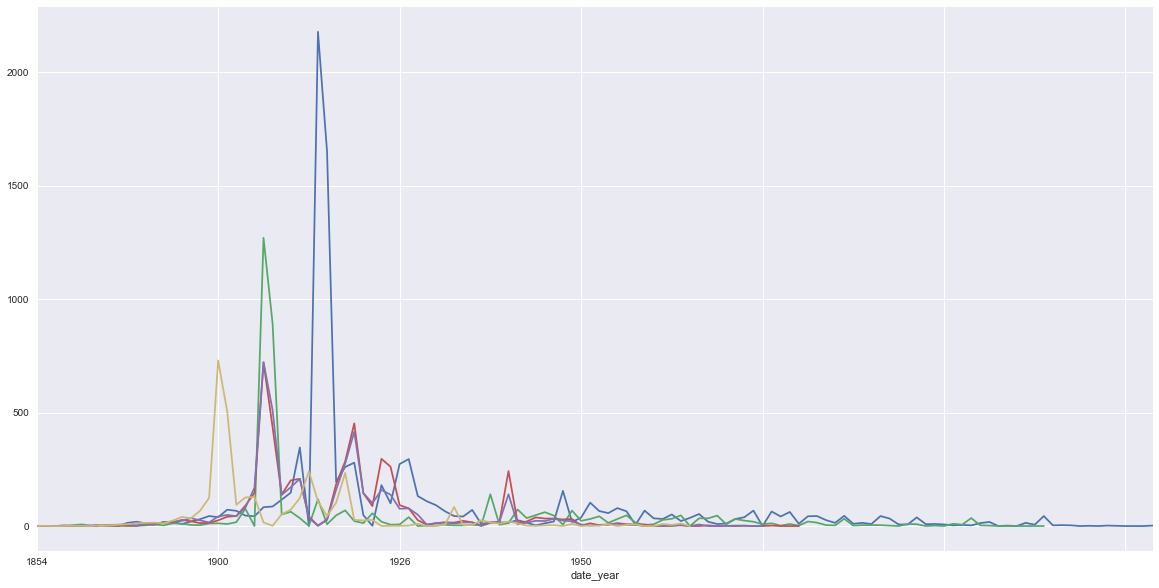

In [51]:
%matplotlib inline

year_series_list = []

for lookup_menus_df,dish in zip(lookup_menus_df_list,top5['name']):
    by_year = lookup_menus_df.groupby(lookup_menus_df['date_year'])
    year_series = cleanYearSeries(by_year.size())
    year_series.to_csv(dish+".csv")
    year_series.plot(figsize=(20,10))
    #sns.tsplot(data=year_series, time="Year", value="BOLD signal")
    year_series_list.append(year_series)


Of course, this graph does not look right. What's going on with that huge spike at the beginning of the 20th century? And why do the number of appearances decrease toward mid-century? 

This skew is an artifact of the coverage of the underlying menu collection that NYPL holds. From the Library's own [collection guide](http://digitalgallery.nypl.org/nypldigital/explore/dgexplore.cfm?col_id=159): 
> Thousands of menus beginning with the oldest items in the collection from 1851. The collection is strongest for the period between 1890 and 1910.

This is why NYPL, on their own site, has normalized the plot of dish appearances by total number of menus held for a given year.

In [46]:
# Extract years in the complete DataFrame for menus
menu_df['date_year'] = menu_df['date'].map(extract_year)

# Group by year and calculate the number of menus held for each year
total_menu_by_year = menu_df.groupby(menu_df['date_year'])
menu_total_series = cleanYearSeries(total_menu_by_year.size())
#total_menu_by_year.head(10)

dish_df_by_year = dish_df.groupby(dish_df['first_appeared'])
dish_df_by_year.head(20)

,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,name_modified,fingerprint
id,,,,,,,,,
1,Consomme Printaniere Royal,8,8,1897,1927,0.20,0.40,consomme printaniere royal,consommeprintaniereroyal
2,Chicken Gumbo,111,117,1895,1960,0.10,0.80,chicken gumbo,chickengumbo
3,Tomato Aux Croutons,13,13,1893,1917,0.25,0.40,tomato aux croutons,auxcroutonstomato
4,Onion Au Gratin,41,41,1900,1971,0.25,1.00,onion au gratin,augratinonion
5,St Emilion,66,68,1881,1981,0.00,18.00,st emilion,emilionst
7,Radishes,3262,3346,1854,2928,0.00,25.00,radishes,radishes
8,Chicken With Rice Soup,48,49,1897,1961,0.10,0.60,chicken with rice soup,chickenricesoupwith
9,Cup Clam Broth,14,16,1899,1962,0.15,0.40,cup clam broth,brothclamcup
10,Cream of New Asparagus Croutons,2,2,1900,1900,0.00,0.00,cream of new asparagus croutons,asparaguscreamcroutonsnewof


With this information, we can create a normalized graph:

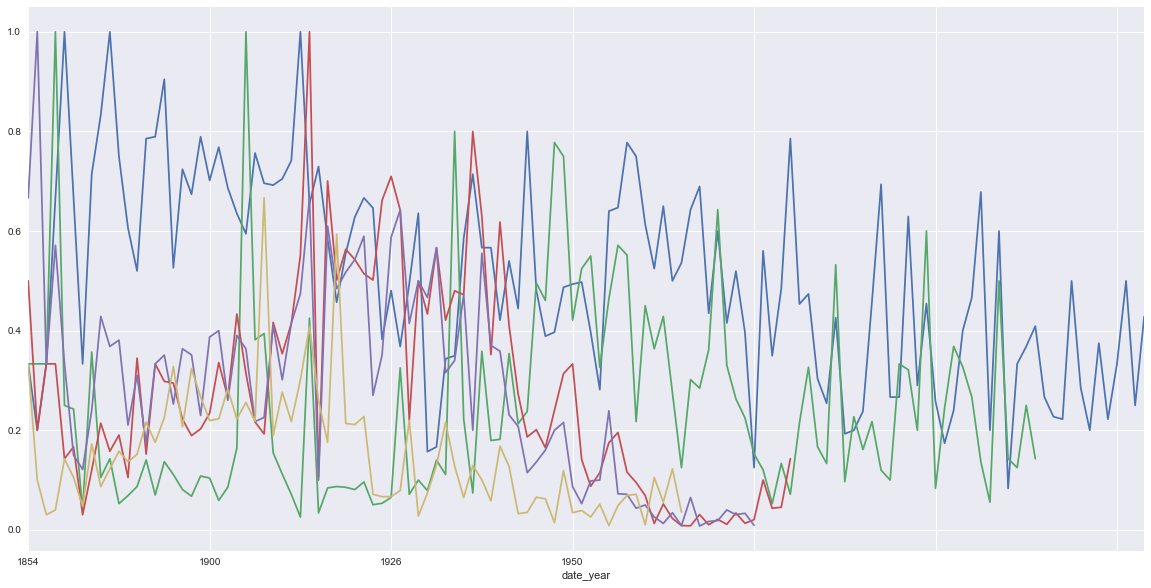

In [47]:
for year_series,dish in zip(year_series_list,top5['name']):
    normed = [float(year_series[date_year])/menu_total_series[date_year].astype(float) for date_year in year_series.index.tolist()]
    seriesData = cleanYearSeries(pd.Series(normed, index=year_series.index))
    seriesData.to_csv(dish+"_normed.csv")
    seriesData.plot(figsize=(20,10))

I hope this notebook demonstrates some ways to use the data analysis tools provided by Pandas in the service of curating data from *What's On the Menu?*